### 단층, 다층 퍼셉트론  모델 설계 후  결과 확인  

### Q1). 단층 퍼셉트론 적용 알고리즘의 프로세스를 구현  

- 1) 순차모형  :  tf.keras.models.Sequential
- 2) 레이어 구성  :tf.keras.layers.Dense  
- 3) f(net)   :  tf.keras.layers.Dense( units,  activation='linear'  )  
- 4) 최적화 함수 : tf.keras.optimizers.experimental.SGD()   
- 5) 손실함수  : tf.keras.losses.mse 
- 6) 평가지표  : 정답률  acc

<< 모델 구성  -> 레이어 추가  -> 컴파일  -> 학습  >>  

###  fit(   x=None,    y=None,    batch_size=None,    epochs=1 )  

ex) 1000개 샘플  / 배치 100  =  10개의 배치로 나누어 처리된다.   ->  하나의 에폭에서 최적화 함수는 10번 실행된다. 

-----> 에폭  10  = 최적화 함수  10  *(배치당 최적화 실행 회수)  

10*10  =100번  최적화 함수가 실행된다.   

-----------ex)  샘플50 , 에폭이 5, 배치 1   = 최적화 함수 실행은 ?   50* 5/ 1   = 250 번 



In [1]:
#Q1-1 )모듈 임포트  
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers  import  Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses  import mse
import keras

In [2]:
#Q1-2) 데이터 준비  -> OR 연산자로 모델을 확인 해보자.  
data  =  np.array([ [0,0] , [1,0] ,[0,1] ,[1,1] ]   )   # X1, X2  의  2개의 특성을 가진 데이터가 4개이다.  
label =  np.array( [[0],[1],[1],[1] ] )  #정답 라벨 y    1*4 

# 1-3  모델 생성 
model =  Sequential()

#1-4 모델에 히든 레이어를 추가하겠다. -> 두개의 특성을 가진 1차원 데이터를 입력 받고 한개의 출력을 가진  Dense층  
#Dense(1,) -> 하나의 히든 레이어를 만들겠다. 
#은닉계층이 1개이고 입력 계층 단위계수가 2개인것을 [ 퍼셉트론] 이라고 한다. 
model.add(Dense(1,input_shape=(2,) , activation='linear' )) # 단층 퍼셉트론  -> 퍼셉트론을 생성  

#1-5  모델준비   -> 경사하강법 개선에 대한 속성, 로스, 정답률  등 평가 지표[정확도, 정밀도, 재현율, F1] 회귀 = 평균절대오차MAE, MSE 
model.compile(optimizer = SGD(), loss = mse, metrics = ['Accuracy','Precision' , 'Recall']) 

#1-6 학습  fit() 
model.fit(data,label,epochs= 200)  
     
#1-7 평가지표 및 가중치 값 확인 등 정보확인
print(f'가중치  : {model.get_weights()}') # 모델 가중치 확인 ->  파일저장 [학습결과 /모델 재사용 공유 / 에폭별로 시간간격 /앙상블 ]
print(f'evaluate{model.evaluate(data,label)}' )

#1-8 예측 
preds  = model.predict(data)
for a,b   in zip (preds, label):
    print(f'예측값 {a}  - 정답  {b}') 


Epoch 1/200


1/1 [==============================] - 1s 1s/step - loss: 1.3242 - Accuracy: 0.5000 - precision: 1.0000 - recall: 0.3333
Epoch 2/200
1/1 [==============================] - 0s 9ms/step - loss: 1.2771 - Accuracy: 0.5000 - precision: 1.0000 - recall: 0.3333
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 1.2326 - Accuracy: 0.5000 - precision: 1.0000 - recall: 0.3333
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 1.1906 - Accuracy: 0.5000 - precision: 1.0000 - recall: 0.3333
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 1.1509 - Accuracy: 0.5000 - precision: 1.0000 - recall: 0.3333
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 1.1134 - Accuracy: 0.5000 - precision: 1.0000 - recall: 0.3333
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 1.0779 - Accuracy: 0.5000 - precision: 1.0000 - recall: 0.3333
Epoch 8/200
1/1 [==============================] - 0s 13m

1/1 [==============================] - 0s 6ms/step - loss: 0.4327 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 57/200
1/1 [==============================] - 0s 10ms/step - loss: 0.4281 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 58/200
1/1 [==============================] - 0s 9ms/step - loss: 0.4236 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 59/200
1/1 [==============================] - 0s 7ms/step - loss: 0.4192 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 60/200
1/1 [==============================] - 0s 7ms/step - loss: 0.4149 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 61/200
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 62/200
1/1 [==============================] - 0s 7ms/step - loss: 0.4065 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 63/200
1/1 [==============================] - 0s 9ms/step - l

1/1 [==============================] - 0s 8ms/step - loss: 0.2577 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 117/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2558 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 118/200
1/1 [==============================] - 0s 8ms/step - loss: 0.2539 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 119/200
1/1 [==============================] - 0s 8ms/step - loss: 0.2520 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 120/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2501 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 121/200
1/1 [==============================] - 0s 8ms/step - loss: 0.2483 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 122/200
1/1 [==============================] - 0s 10ms/step - loss: 0.2464 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 123/200
1/1 [==============================] - 0s 6ms/s

1/1 [==============================] - 0s 8ms/step - loss: 0.1708 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 177/200
1/1 [==============================] - 0s 6ms/step - loss: 0.1697 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 178/200
1/1 [==============================] - 0s 6ms/step - loss: 0.1687 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 179/200
1/1 [==============================] - 0s 10ms/step - loss: 0.1676 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 180/200
1/1 [==============================] - 0s 6ms/step - loss: 0.1666 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 181/200
1/1 [==============================] - 0s 7ms/step - loss: 0.1656 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 182/200
1/1 [==============================] - 0s 9ms/step - loss: 0.1646 - Accuracy: 0.7500 - precision: 1.0000 - recall: 0.6667
Epoch 183/200
1/1 [==============================] - 0s 5ms/s

Q2) 단층 퍼셉트론을 이용한 AND 연산자 학습을 해보자.
1. 데이터 준비:  입력 데이터는 [ [0,0], [0,1], [1,0], [1,1] ], 정답레이블 [ [0], [0], [0], [1] ]  

2.  모델 구성: tf.keras.models.Sequential을 사용하여 순차 모델 구성

3.  레이어 구성: tf.keras.layers.Dense를 사용하여 단일 레이어를 구성 
    두 개의 입력을 받고 하나의 출력, units=1과 activation='linear' 파라미터를 사용
   
4. 최적화 함수: tf.keras.optimizers.experimental.SGD를 사용
5. 손실 함수: tf.keras.losses.mse 
6. 평가 지표:  metrics=['accuracy']를 설정

In [3]:
import matplotlib.pyplot as plt
data  =  np.array([ [0,0] , [0,1] ,[1,0] ,[1,1] ]   )
label =  np.array( [[0],[0],[0],[1] ] )  

model =  Sequential()
model.add(Dense(1,input_shape=(2,) , activation='linear' ))
model.compile(optimizer = SGD(), loss = mse, metrics = ['accuracy']) 

history = model.fit(data,label,epochs= 100,verbose=0)  


#1-8 예측 
preds  = model.predict(data)
for a,b   in zip (preds, label):
    print(f'예측값 {a}  - 정답  {b}') 

'''
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('accuracy')
plt.show()
'''

1/1 [==============================] - 0s 52ms/step
예측값 [-0.04419534]  - 정답  [0]
예측값 [0.95047355]  - 정답  [0]
예측값 [-0.3896703]  - 정답  [0]
예측값 [0.6049986]  - 정답  [1]


"\nplt.figure(figsize=(12,5))\n\nplt.subplot(1,2,1)\nplt.plot(history.history['loss'],label='Training Loss')\nplt.plot(history.history['val_loss'],label='val_loss')\nplt.legend()\nplt.title('loss')\n\nplt.subplot(1,2,2)\nplt.plot(history.history['accuracy'],label='Training accuracy')\nplt.plot(history.history['val_accuracy'],label='val_accuracy')\nplt.legend()\nplt.title('accuracy')\nplt.show()\n"

Q3)  XOR로 다층 퍼셉트론 구현을 해보자.  

1. 데이터 준비: 입력 데이터는 [ [0,0], [0,1], [1,0], [1,1] ]이며, 정답 레이블 [ [0], [1], [1], [0] ]

2. 모델 구성: 순차 모델은 tf.keras.models.Sequential을 사용하여 구성

3. 레이어 구성: 순차 모델 사용 (tf.keras.models.Sequential) 
    - 첫 번째 은닉층: units=2 (두 개의 노드)와 activation='relu'
    - 출력층: units=1 (하나의 노드)와 activation='sigmoid'

4. 최적화 함수: tf.keras.optimizers.Adam

5. 손실 함수: tf.keras.losses.BinaryCrossentropy

6. 평가 지표:  metrics=['accuracy']를 설정

In [4]:
data  =  np.array([ [0,0] , [0,1] ,[1,0] ,[1,1] ]   )
label =  np.array( [[0],[1],[1],[0] ] )  

model =  Sequential()
model.add(Dense(2,input_shape=(2,) , activation='relu' ))
model.add(Dense(1, activation='sigmoid' ))
model.compile(optimizer = 'Adam', loss = 'BinaryCrossentropy', metrics = ['accuracy']) 

history = model.fit(data,label,epochs= 200)  

loss , accuracy = model.evaluate(data,label)
print(f'loss : {loss} , Accuracy : {accuracy}')


Epoch 1/200
1/1 [==============================] - 1s 957ms/step - loss: 0.7030 - accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7025 - accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7020 - accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 0.7009 - accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 4ms/step - loss: 0.7004 - accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6999 - accuracy: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6989 - accuracy: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6984 - accuracy: 0.5000
Epoch 11/200
1/1 [========

1/1 [==============================] - 0s 5ms/step - loss: 0.6687 - accuracy: 0.5000
Epoch 83/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6683 - accuracy: 0.5000
Epoch 84/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6679 - accuracy: 0.5000
Epoch 85/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6676 - accuracy: 0.5000
Epoch 86/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6672 - accuracy: 0.5000
Epoch 87/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6668 - accuracy: 0.5000
Epoch 88/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6664 - accuracy: 0.5000
Epoch 89/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.5000
Epoch 90/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6657 - accuracy: 0.5000
Epoch 91/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6653 - accuracy: 0.5000
Epoch 92/200
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 0.6405 - accuracy: 0.7500
Epoch 166/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6402 - accuracy: 0.7500
Epoch 167/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.7500
Epoch 168/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.7500
Epoch 169/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.7500
Epoch 170/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6390 - accuracy: 0.7500
Epoch 171/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.7500
Epoch 172/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6384 - accuracy: 0.7500
Epoch 173/200
1/1 [==============================] - 0s 5ms/step - loss: 0.6381 - accuracy: 0.7500
Epoch 174/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6378 - accuracy: 0.7500
Epoch 175/200
1/1 [=====

In [5]:
data  = np.random.randint(0,5,(20,1))
label = np.where(data %2 == 0, [0,1] , [1,0])


model =  Sequential([
                    tf.keras.layers.Dense(units=512,activation='relu',input_shape=(1,)),
                    tf.keras.layers.Dense(units=256,activation='relu'),
                    tf.keras.layers.Dense(units=2,activation='softmax'),
                    ])

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

history = model.fit(data,label,epochs= 700,batch_size=8,verbose=0,validation_split=0.2)  



1/1 [==============================] - 0s 89ms/step


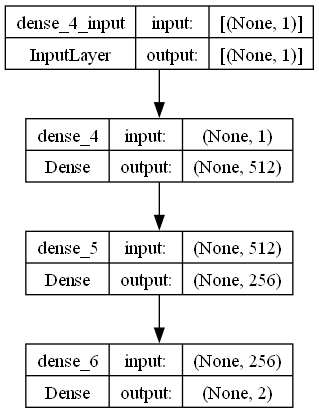

In [6]:
#예측
model.predict([1])
#model.predict([3,4])
keras.utils.plot_model(model,show_shapes=True, to_file='img/my_model.png',show_layer_names=True)